In [25]:
using PyPlot
using CSV
using DataFrames

In [133]:
initial = CSV.read("/Users/mmbell/Development/scythe/SW_output/gridded_out_0.0.csv", DataFrame, header=1)
output = CSV.read("/Users/mmbell/Development/scythe/SW_output/gridded_out_960.0.csv", DataFrame, header=1)

,r,l,x,y,v,u,h,v_r
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,-1.49793e-14,5.29799e-14,-0.140272,0.000600837
2,0.0,0.0104546,0.0,0.0,-1.55377e-14,5.28108e-14,-0.140272,0.000600837
3,0.0,0.0209091,0.0,0.0,-1.60943e-14,5.26357e-14,-0.140272,0.000600837
4,0.0,0.0313637,0.0,0.0,-1.6649e-14,5.24547e-14,-0.140272,0.000600837
5,0.0,0.0418182,0.0,0.0,-1.72017e-14,5.22678e-14,-0.140272,0.000600837
6,0.0,0.0522728,0.0,0.0,-1.77524e-14,5.2075e-14,-0.140272,0.000600837
7,0.0,0.0627273,0.0,0.0,-1.8301e-14,5.18764e-14,-0.140272,0.000600837
8,0.0,0.0731819,0.0,0.0,-1.88474e-14,5.16721e-14,-0.140272,0.000600837
9,0.0,0.0836364,0.0,0.0,-1.93916e-14,5.1462e-14,-0.140272,0.000600837


In [134]:
radius = reshape(output.r,601,100)[1,:]
lambda = reshape(output.l,601,100)[:,1]
h = reshape(output.h,601,100)'
hr = reshape(output.h_r,601,100)'
u = reshape(output.u,601,100)'
v = reshape(output.v,601,100)'
x = reshape(output.x,601,100)'
y = reshape(output.y,601,100)'

100×601 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0     0.0        0.0        0.0    …     -0.0       -0.0        -0.0
 0.0    20.9087    41.8152    62.717       -62.717    -41.8152    -20.9087
 0.0    41.8174    83.6303   125.434      -125.434    -83.6303    -41.8174
 0.0    62.7262   125.445    188.151      -188.151   -125.445     -62.7262
 0.0    83.6349   167.261    250.868      -250.868   -167.261     -83.6349
 0.0   104.544    209.076    313.585  …   -313.585   -209.076    -104.544
 0.0   125.452    250.891    376.302      -376.302   -250.891    -125.452
 0.0   146.361    292.706    439.019      -439.019   -292.706    -146.361
 0.0   167.27     334.521    501.736      -501.736   -334.521    -167.27
 0.0   188.178    376.336    564.453      -564.453   -376.336    -188.178
 0.0   209.087    418.152    627.17   …   -627.17    -418.152    -209.087
 0.0   229.996    459.967    689.887      -689.887   -459.967    -229.996
 0.0   250.905    501.782    752.604      -752.604   -5

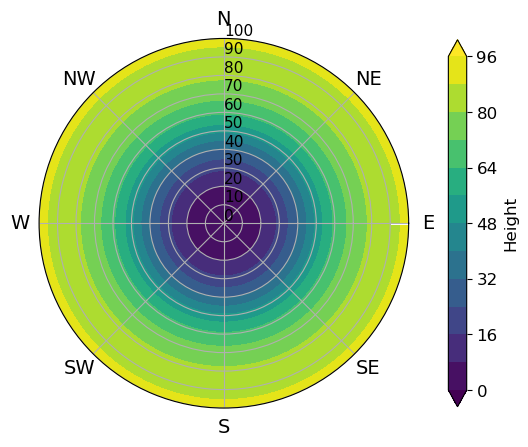

In [137]:
ax = plt.subplot(111, projection="polar");
#plt.contour(lambda, radius, v, levels=(10));
plt.contourf(lambda, radius, h, levels=(16), extend="both");
cb = plt.colorbar(fraction=0.037, pad=0.08);
cb.set_label("Height", size=12)
cb.ax.tick_params(labelsize=12)
ax.set_rlabel_position(90)
ax.set_rticks(0:10000:100000)
ax.set_yticklabels(0:10:100, fontsize=11)
ax.set_xticklabels(["E", "NE", "N", "NW", "W", "SW", "S", "SE"], fontsize=14)
ax.set_rmax(100000)
plt.savefig("shallow_water_test.png")